In [120]:
import cv2
import matplotlib.pyplot as plt

In [121]:
#lectura de imagen
img = cv2.imread('ruido.jpg')

#transformación a niveles de gris
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

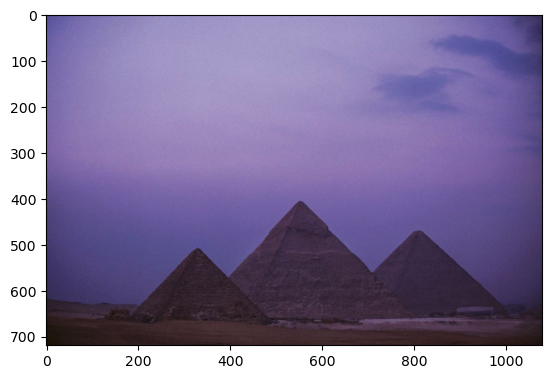

719 1080 3


error: OpenCV(4.5.3) D:\bld\libopencv_1632857504416\work\modules\imgproc\src\median_blur.dispatch.cpp:285: error: (-215:Assertion failed) (ksize % 2 == 1) && (_src0.dims() <= 2 ) in function 'cv::medianBlur'


In [122]:
plt.imshow(img_rgb)
plt.show()

#lectura de la imagen
m,n,ch = img_rgb.shape
print(m,n,ch)


#aplicamos el filtro
img_median = cv2.medianBlur(img_rgb,6)

cv2.imwrite('resultado_ruido.png',cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
plt.imshow(img_median)
plt.show()